# Load packages

In [152]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.offline
import cufflinks as cf 
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

cf.set_config_file(theme='white')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/coronavirusdataset/trend.csv
/kaggle/input/coronavirusdataset/route.csv
/kaggle/input/coronavirusdataset/patient.csv
/kaggle/input/coronavirusdataset/time.csv


# Load the data
Let's load the dataset file first

In [70]:
patient=pd.read_csv('/kaggle/input/coronavirusdataset/patient.csv')
time=pd.read_csv('/kaggle/input/coronavirusdataset/time.csv')
route=pd.read_csv('/kaggle/input/coronavirusdataset/route.csv')
trend=pd.read_csv('/kaggle/input/coronavirusdataset/trend.csv')

In [71]:
patient.head()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [72]:
time.head()

,date,time,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,16,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,16,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,16,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,16,27,25,2,0,0,5,4,1,0,0


In [73]:
route.head()

,id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [74]:
trend.head()

,date,cold,flu,pneumonia,coronavirus
0,2019-12-07,0.12408,0.24699,0.22144,0.01309
1,2019-12-08,0.11863,0.25390,0.19617,0.00836
2,2019-12-09,0.16308,0.47880,0.33180,0.01272
3,2019-12-10,0.13981,0.40789,0.30671,0.01881
4,2019-12-11,0.13972,0.39007,0.30299,0.01854


# convert date to datetime

for extract month, day_name, day! 

In [75]:
def date_time_col(df, col, form='%Y/%m/%d'):
    df[col] = pd.to_datetime(df[col], format=form)
    return df[col]

patient['confirmed_date'] = date_time_col(patient,'confirmed_date')
patient['released_date'] = date_time_col(patient,'released_date')
time['date'] = date_time_col(time,'date')

In [76]:
patient['month_confirmed'] = patient['confirmed_date'].dt.month
patient['dow_confirmed'] = patient['confirmed_date'].dt.day_name()
patient['day_confirmed'] = patient['confirmed_date'].dt.day

# Visualization of data
* Epidemiological data of COVID-19 patients in South Korea
* Route data of COVID-19 patients in South Korea (where they had visited)
* Time series data of COVID-19 status in South Korea
* Trend data of the keywords searched in NAVER

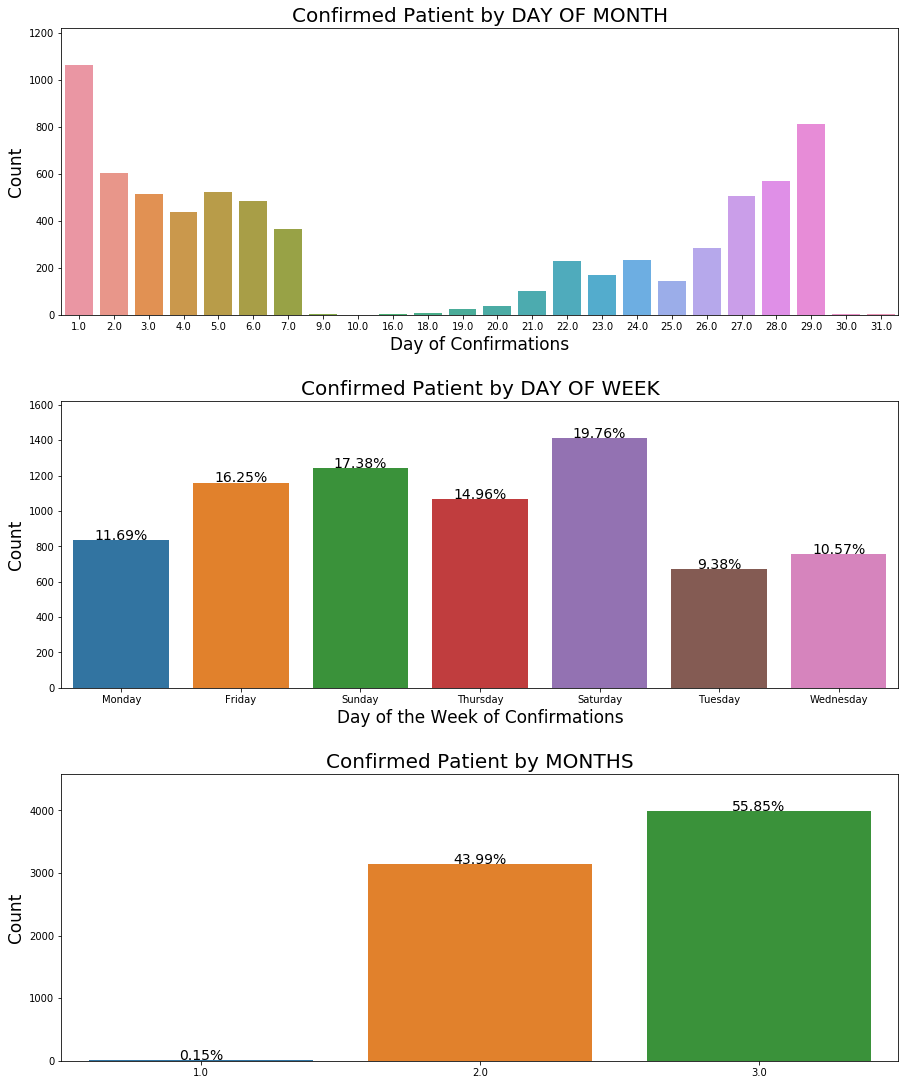

In [173]:
total = len(patient)
plt.figure(figsize=(15,19))

plt.subplot(311)
g = sns.countplot(x="day_confirmed", data=patient)
g.set_title("Confirmed Patient by DAY OF MONTH", fontsize=20)
g.set_ylabel("Count",fontsize= 17)
g.set_xlabel("Day of Confirmations", fontsize=17)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
g.set_ylim(0, max(sizes) * 1.15)

plt.subplot(312)
g2 = sns.countplot(x="dow_confirmed", data=patient)
g2.set_title("Confirmed Patient by DAY OF WEEK", fontsize=20)
g2.set_ylabel("Count",fontsize= 17)
g2.set_xlabel("Day of the Week of Confirmations", fontsize=17)
sizes=[]
for p in g2.patches:
    height = p.get_height()
    sizes.append(height)
    g2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g2.set_ylim(0, max(sizes) * 1.15)

plt.subplot(313)
g1 = sns.countplot(x="month_confirmed", data=patient)
g1.set_title("Confirmed Patient by MONTHS", fontsize=20)
g1.set_ylabel("Count",fontsize= 17)
g1.set_xlabel("", fontsize=17)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g1.set_ylim(0, max(sizes) * 1.15)

plt.subplots_adjust(hspace = 0.3)

plt.show()

In [174]:
sex_series = patient['sex'].value_counts()
sex_series.iplot(kind='bar', yTitle='Count', title='the sex of the patient')

In [175]:
country_series = patient['country'].value_counts()
country_series.iplot(kind='bar', yTitle='Count', title='the country of the patient')

In [176]:
region_series = patient['region'].value_counts()
region_series.iplot(kind='bar', yTitle='Count', title='the region of the patient')

In [177]:
group_series = patient['group'].value_counts()
group_series.iplot(kind='bar', yTitle='Count', title='the collective infection')

In [178]:
infection_reason_series = patient['infection_reason'].value_counts()
infection_reason_series.iplot(kind='bar', yTitle='Count', title='the reason of infection')

In [179]:
state_series = patient['state'].value_counts()
state_series.iplot(kind='bar', yTitle='Count', title='isolated / released / deceased')

# latitude & longitude
Let's visualize the locations of the route

In [79]:
center = [37.541, 126.986] # seoul 
m = folium.Map(location=center, zoom_start=6.5)

df = route[['id', 'latitude', 'longitude']]


for i in df.index[:]:
    folium.CircleMarker(location =df.loc[i, ['latitude', 'longitude']],
                        tooltip = df.loc[i, 'id'], radius = 6,
                        fill=True,
                        fill_opacity=0.7
                        ).add_to(m)

m

In [180]:
province_series = route['province'].value_counts()
province_series.iplot(kind='bar', yTitle='Count', title='Special City / Metropolitan City / Province(-do)')

In [181]:
visit_series = route['visit'].value_counts()
visit_series.iplot(kind='bar', yTitle='Count', title='the type of place visited')

In [124]:
acc_df = time[['date','acc_test','acc_negative','acc_confirmed','acc_released','acc_deceased']].set_index("date")

In [155]:
py.iplot([{
    'x': acc_df.index,
    'y': acc_df[col],
    'name': col
}  for col in acc_df.columns], filename='cufflinks/simple-line')

In [130]:
new_df = time[['date','new_test', 'new_negative', 'new_confirmed', 'new_released', 'new_deceased']].set_index("date")

In [154]:
py.iplot([{
    'x': new_df.index,
    'y': new_df[col],
    'name': col
}  for col in new_df.columns], filename='cufflinks/simple-line')

In [169]:
trend_df = trend[['date','cold', 'flu', 'pneumonia', 'coronavirus']].set_index("date")

In [170]:
py.iplot([{
    'x': trend_df.index,
    'y': trend_df[col],
    'name': col
}  for col in trend_df.columns], filename='cufflinks/simple-line')